### Exploratory Data Analysis

In [114]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [115]:
# read csv file as a dataframe
data = pd.read_csv('DSA_Data_Set.csv')

In [116]:
# create second and third dataframes to analyze the target variable as yes or not
target_yes = data.loc[data['y']=='yes']

In [117]:
target_no = data.loc[data['y']=='no']

In [118]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [119]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.567417,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.655416,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.574102,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.615098,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0.631597,no


#### Rows and Columns

In [120]:
# rows and columns in dataset
data.shape

(41188, 22)

In [121]:
# rows and columns y='yes'
target_yes.shape

(4640, 22)

In [122]:
# rows and columns y='no'
target_no.shape

(36548, 22)

#### Descriptive Statistics

In [123]:
# analyze numerical variables with descriptive statistics for the entire dataset, outcome=yes, outcome = no
# find similarities in the distributions
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [124]:
target_yes.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,0.736021
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641,0.195098
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000,0.576202
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000,0.792657
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000,0.935985
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.981402


In [125]:
target_no.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,0.906841
std,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979,0.097924
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.272060
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000,0.881547
50%,38.000000,163.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000,0.948100
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000,0.959982
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [126]:
boxplot for numerical all

SyntaxError: invalid syntax (<ipython-input-126-a89fdbed24e7>, line 1)

#### Identify categorical data

In [127]:
#column names
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction', 'y'],
      dtype='object')

In [128]:
#unique values in each column
data.nunique()

age                   78
job                   12
marital                4
education              8
default                3
housing                3
loan                   3
contact                2
month                 10
day_of_week            5
duration            1544
campaign              42
pdays                 27
previous               8
poutcome               3
emp.var.rate          10
cons.price.idx        26
cons.conf.idx         26
euribor3m            316
nr.employed           11
ModelPrediction    38444
y                      2
dtype: int64

#### Job

In [129]:
#job type
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

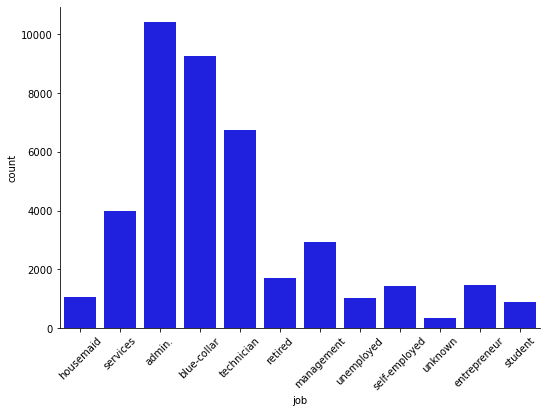

In [130]:
#entire dataset
job = sns.factorplot("job", data=data, aspect=1.5, kind="count", color="b")
job.set_xticklabels(rotation=45)

In [134]:
#find "unknown" count and distribution entire dataset
#data.job.value_counts()

In [135]:
#find "unknown" count and distribution for 'y' as outcome 'yes'
#target_yes.job.value_counts()

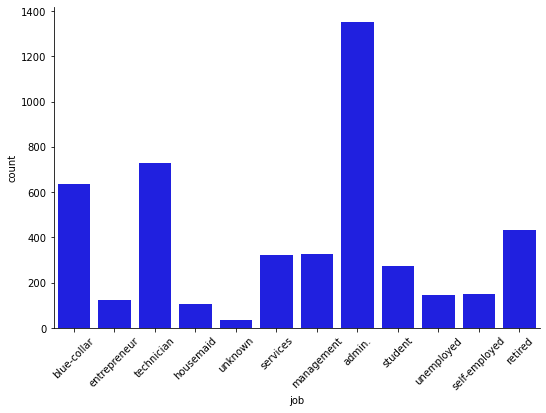

In [133]:
#for those who subscribe. Outcome=Yes
job = sns.factorplot("job", data=target_yes, aspect=1.5, kind="count", color="b")
job.set_xticklabels(rotation=45)

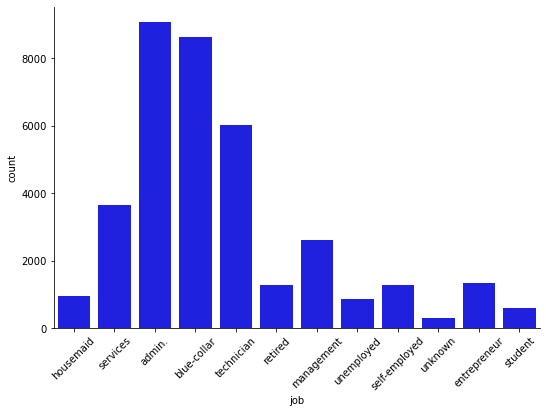

In [136]:
#For those who did not subscribed.  Outcome=no
job = sns.factorplot("job", data=target_no, aspect=1.5, kind="count", color="b")
job.set_xticklabels(rotation=45)

In [137]:
#find "unknown" count and distribution for 'y' as outcome 'no'
#target_no.job.value_counts()

#### Marital Status

In [22]:
#marital status
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [23]:
#find unknown count and distribution
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [24]:
#find "unknown" count and distribution for 'y' as outcome 'yes'
target_yes.marital.value_counts()

married     2532
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

In [25]:
#find "unknown" count and distribution for 'y' as outcome 'no'
target_no.marital.value_counts()

married     22396
single       9948
divorced     4136
unknown        68
Name: marital, dtype: int64

#### Education level

In [26]:
#education level
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [27]:
#find unknown count and distribution
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [28]:
#find "unknown" count and distribution for 'y' as outcome 'yes'
target_yes.education.value_counts()

university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64

In [29]:
#find "unknown" count and distribution for 'y' as outcome 'no'
target_no.education.value_counts()

university.degree      10498
high.school             8484
basic.9y                5572
professional.course     4648
basic.4y                3748
basic.6y                2104
unknown                 1480
illiterate                14
Name: education, dtype: int64

#### Default

In [30]:
#has a credit in default?
data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [31]:
#find unknown count and distribution
data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [32]:
#find "unknown" count and distribution for 'y' as outcome 'yes'
target_yes.default.value_counts()

no         4197
unknown     443
Name: default, dtype: int64

In [33]:
#find "unknown" count and distribution for 'y' as outcome 'no'
target_no.default.value_counts()

no         28391
unknown     8154
yes            3
Name: default, dtype: int64

#### Housing loan

In [34]:
#has a housing loan?
data['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [35]:
#find unknown count and distribution
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [36]:
#find "unknown" count and distribution for 'y' as outcome 'yes'
target_yes.housing.value_counts()

yes        2507
no         2026
unknown     107
Name: housing, dtype: int64

In [37]:
#find "unknown" count and distribution for 'y' as outcome 'no'
target_no.housing.value_counts()

yes        19069
no         16596
unknown      883
Name: housing, dtype: int64

#### Personal loan

In [38]:
#has a personal loan?
data['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [39]:
#find unknown count and distribution
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [40]:
#find "unknown" count and distribution for 'y' as outcome 'yes'
target_yes.loan.value_counts()

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [42]:
#find "unknown" count and distribution for 'y' as outcome 'no'
target_no.loan.value_counts()

no         30100
yes         5565
unknown      883
Name: loan, dtype: int64

#### Contact communication type

In [43]:
#contact communication type
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [44]:
#find unknown count and distribution
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [45]:
#find "unknown" count and distribution for 'y' as outcome 'yes'
target_yes.contact.value_counts()

cellular     3853
telephone     787
Name: contact, dtype: int64

In [46]:
#find "unknown" count and distribution for 'y' as outcome 'no'
target_no.contact.value_counts()

cellular     22291
telephone    14257
Name: contact, dtype: int64

#### Last Contact - Month

In [47]:
#last contact - month
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [48]:
#find unknown count and distribution
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [49]:
#find "unknown" count and distribution for 'y' as outcome 'yes'
target_yes.month.value_counts()

may    886
aug    655
jul    649
jun    559
apr    539
nov    416
oct    315
mar    276
sep    256
dec     89
Name: month, dtype: int64

In [50]:
#find "unknown" count and distribution for 'y' as outcome 'no'
target_no.month.value_counts()

may    12883
jul     6525
aug     5523
jun     4759
nov     3685
apr     2093
oct      403
sep      314
mar      270
dec       93
Name: month, dtype: int64

#### Last Contact - day of week

In [51]:
#last contact - day of week
data['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [52]:
#find unknown count and distribution
data.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [53]:
#find "unknown" count and distribution for 'y' as outcome 'yes'
target_yes.day_of_week.value_counts()

thu    1045
tue     953
wed     949
mon     847
fri     846
Name: day_of_week, dtype: int64

In [54]:
#find "unknown" count and distribution for 'y' as outcome 'no'
target_no.day_of_week.value_counts()

mon    7667
thu    7578
wed    7185
tue    7137
fri    6981
Name: day_of_week, dtype: int64

#### Outcome of the previous marketing campaign

In [67]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [69]:
#find unknown count and distribution
data.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [70]:
#find "unknown" count and distribution for 'y' as outcome 'yes'
target_yes.poutcome.value_counts()

nonexistent    3141
success         894
failure         605
Name: poutcome, dtype: int64

In [71]:
#find "unknown" count and distribution for 'y' as outcome 'no'
target_no.poutcome.value_counts()

nonexistent    32422
failure         3647
success          479
Name: poutcome, dtype: int64

### Clean Data

In [74]:
#find missing values
data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

In [84]:
#drop duration column
data_clean = data.drop(['duration'], axis=1)
data_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


#### Investigate outliers

In [87]:
# Determine interquartile range for numerical variables
Q1 = data_clean.quantile(0.25)
Q3 = data_clean.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                 15.000000
campaign             2.000000
pdays                0.000000
previous             0.000000
emp.var.rate         3.200000
cons.price.idx       0.919000
cons.conf.idx        6.300000
euribor3m            3.617000
nr.employed        129.000000
ModelPrediction      0.101729
dtype: float64


In [88]:
#How many outliers detected? 10k+ is a large portion it is better not to remove outliers
#from our dataset
data_clean_out = data_clean[~((data_clean < (Q1 - 1.5 * IQR)) |(data_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
data_clean_out.shape

(31170, 21)

### Relationship Analysis

In [89]:
correlation = data_clean.corr()

<AxesSubplot:>

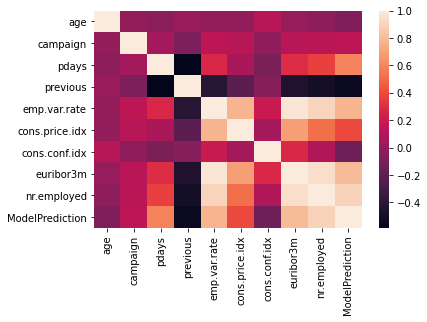

In [93]:
sns.heatmap(correlation)

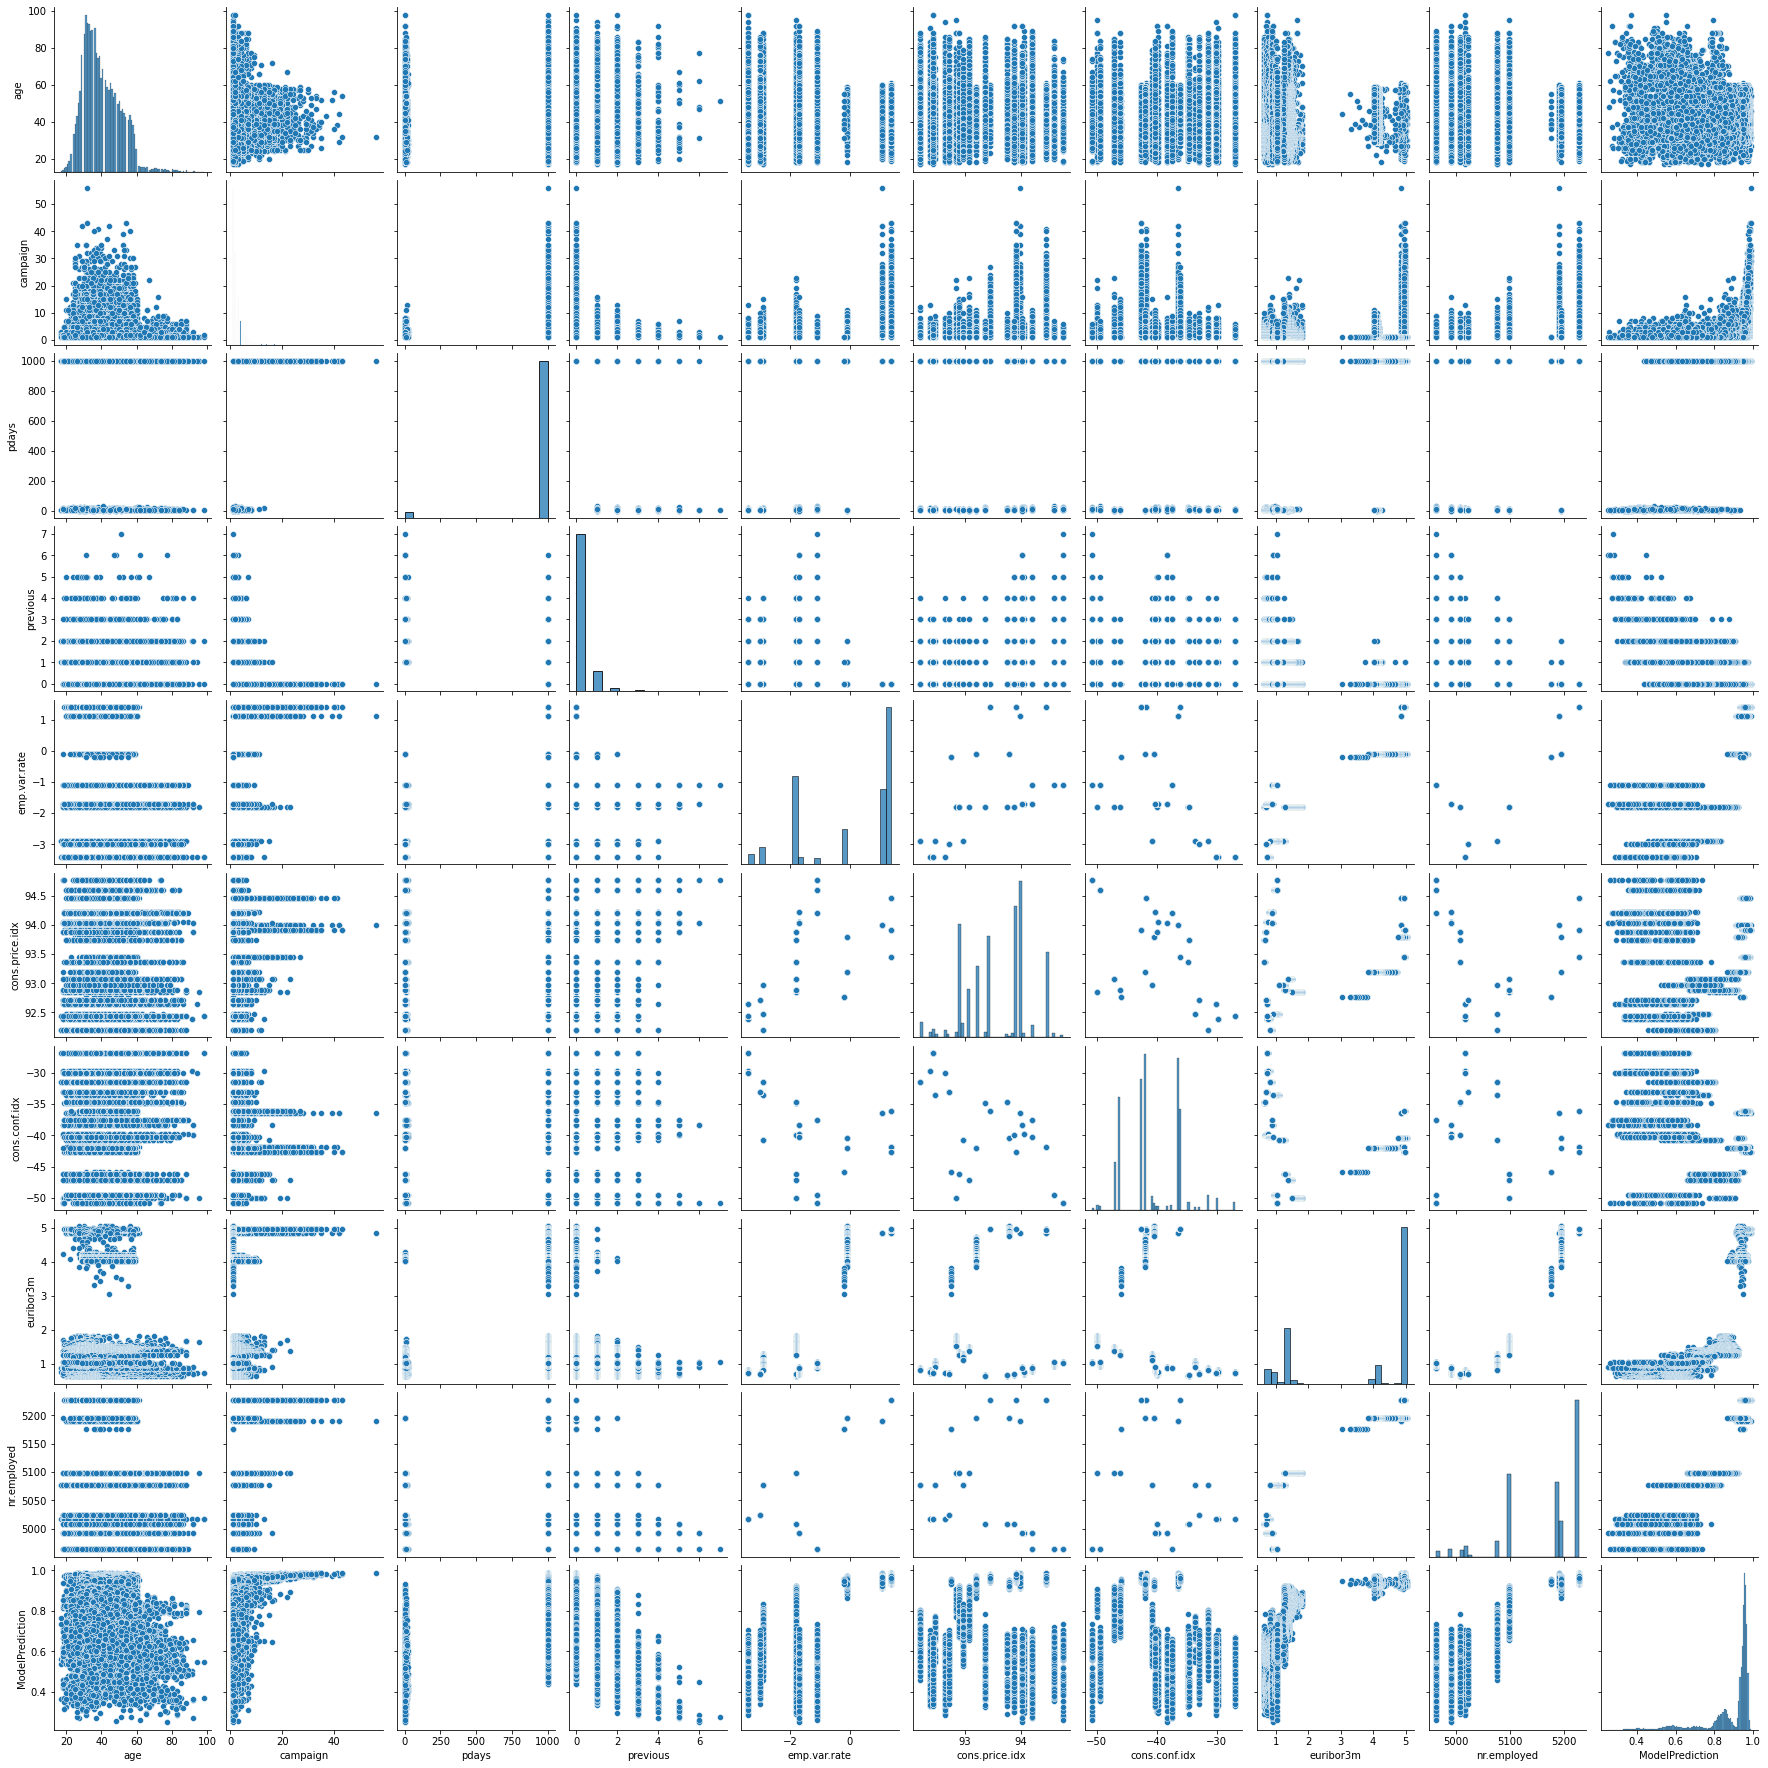

In [94]:
sns.pairplot(data_clean)

<AxesSubplot:xlabel='ModelPrediction', ylabel='Density'>

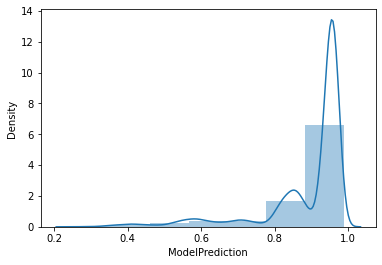

In [138]:
# the existing model predicts that most of the customers will subscribe to the term deposit.  Therefore it
#is suggesting to call most of the clients when doing a telemarketing campaign
sns.distplot(data_clean['ModelPrediction'], bins=7)

In [ ]:
boxplot for model prediction

In [ ]:
whisker for all variables

### Machine Learning Model